In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Decision Tree

---

<center><img
src="https://i.pinimg.com/originals/ab/8b/39/ab8b3911155c14eea07fd04c45cfab5a.jpg" style="width:50%;height:50%;">
</center>

---

* A decision tree is a hierarchical data structure that implements the divide-and-conquer strategy. It is a non-parametric method used for classification and regression. A decision tree consists of internal decision nodes and terminal leaves. Each decision node implements a test function with different results that labels the branches. Given an input, a test is run at each node and depending on the result, one of the branches is taken. This process begins at the root and iteratively repeats until it reaches a leaf node.

> In parametric estimation, we define a model over the entire input field and learn its parameters from all training data. In nonparametric estimation, we divide the input space into local regions defined by a distance measure such as the Euclidean norm, and for each input the corresponding local models calculated from the training data in that region are used.

---
### Decision trees basically learn the hierarchy of if-else questions

---
* Decision trees are a non-cyclical graph used for decision making.
> Graph: It is a construct that specifies a set of objects to which pairs of objects are in some sense "related".
* At each branching node of the graph, a certain property "j" of the feature vector is checked. A threshold is selected for the feature, and if the feature falls below this threshold, the left branch is followed, otherwise the right branch is followed. When the leaf node is reached, the class decision is made.
* A decision tree starts with a single node, which is split into possible outcomes. Each of the allocated possible outcomes is split into different possible outcomes and additional nodes are created which form a tree view.
---
### Decision tree learns from data
---
> In the tree model, besides determining when the model should stop in the background, it is decided which features to choose and which conditions to use for splitting. Since the tree will grow haphazardly, it will need to be pruned.

---
<center><img
src="https://annalyzin.files.wordpress.com/2016/07/decision-tree-tutorial-animated3.gif" style="width:50%;height:50%;">
</center>

---
**There are 3 types of nodes in the decision tree:**
 - Lucky Knot: indicated by a circle and shows the probabilities of certain outcomes.
 - Decision Node: indicated by a square and indicates a decision to be made.
 - Final Node: shows the final result of a decision path.
<center><img
src="https://cdn-cashy-static-assets.lucidchart.com/lucidspark/marketing/blog/2020Q4/decision-tree/Decision-tree.png" style="width:75%;height:75%;">
</center>


---

> A decision tree is considered optimal when it represents the most data with the least number of questions. Algorithms designed to generate optimized decision trees include CART, ASSISTANT, CLS, and ID3-4-5.

* The decision tree should identify the optimal point to split the data at each level. It does this with one of the techniques gini, information gain and variance reduction.

# Gini
---
It is a measure of how often a randomly selected item from the set will be mislabeled. Gini is calculated with the following formula:
<center><img
src="https://ichi.pro/assets/images/max/724/1*otdoiyIwxJI-UV0ukkyutw.png" style="width:25%;height:25%;">
</center>
- Pj is the probability of class j.

The minimum value of the Gini index is 0. If the value is zero, it indicates that all data has a single label. In this case, the node is not split again and the optimum solution is chosen by features with less gini values. If there are equal amounts of two classes (0-1), the gini index takes the maximum value

---

### $$GINI_{min} = 1 - 1^2 = 0$$

### $$GINI_{max} = 1 - (0.5^2 + 0.5^2) = 0.5$$

---

* E.g; we have 4 gummies and we want to estimate the red-blue label, let's calculate how often they will be measured incorrectly. Let's assume that the 4 gums we have are blue in color, where the gini is 0 because no gum can be miscalculated. If we choose to arbitrarily label the gums red, the gini will still be 0. Because we won't be able to guess any gum correctly. Assuming we have 2 blue and 2 red gums, the gini will be 0.5. We will guess half right and half wrong. For binary target variables, 0.5 is the least pure possible value. Tags are half scattered. If we divide the Gini scores by 0.5 it will be 0.5 / 0.5 = 1, so the grouping is not pure. 3 red and 1 blue gum;


### $$GiniIndex = 1 - (0.75^2 + 0.25^2) = 0.375 $$

- The Gini Index will be 0.375. If we divide this by 0.5, the probability of incorrect/correct labeling will be 0.75.

---

# Entropy

---

We calculate the entropy using the following formula:


<center><img
src="https://miro.medium.com/max/1008/1*_Sj7YkkUJSOzDRv9_DATlQ.png" style="width:25%;height:25%;">
</center>


* Because Entropy uses logarithms, it is heavier to calculate. The basic idea, like Gini, is to measure the disorder of a group against the target variable. Again, like Gini, the optimum distribution is determined by the feature with less Entropy value, when the probability of the two classes is the same, the maximum Entropy is, and if the data consists of a label belonging to a single class, the node is pure, the Entropy minimum is 0.

---

### $$Entropy_{min} = -1.log_2(1) = 0$$
### $$Entropy_{max} = -0.5.log_2(0.5)-0.5.log_2(0.5) = 1$$

* If we use the chewing gum example above for entropy

**For 4 blue 0 red gum:**

$$Entropy = [(4/4) . log_2(4/4)] - [(0/4) . log_2(0/4)] = 0 $$

**For 2 blue 2 red gums:**

$$Entropy = [(2/4) . log_2(2/4)] - [(2/4) . log_2(2/4)] = 1 $$

**For 3 blue 1 red gum:**

$$Entropy = [(3/4) . log_2(3/4)] - [(1/4) . log_2(1/4)] = 0.811 $$



#### Here, the false/correct labeling ratio will be 0.811. Slightly worse than the Gini score.

# Gini vs Entropy
---
* The main difference between Gini and Entropy is that Gini takes values between [0 - 0.5] while Entropy is between [0 - 1]. In the image below, gini has been multiplied by 2 for tangible difference.


<center><img
src="https://quantdare.com/wp-content/uploads/2020/11/entropy_and_gini.png" style="width:75%;height:75%;">
</center>

* In terms of computation, Entropy is more complex as it uses logarithms, Gini computation will be faster and simpler. Scores with Entropy are slightly better, Gini is cheaper and faster. However, if the times are compared, it seems that the closeness of the scores to each other is not worth calculating Entropy, since the time spent on training is much more for Entropy.

---

# Information Gain

---
* Information gain is based on subtracting all entropy after dividing a data set over a feature. The smaller the entropy, the higher the importance of that feature (ID3). However, with Information Gain, the situation is the opposite. While constructing the decision tree, the feature with the highest Information Gain is selected.

> The knowledge gain is why pollution is so important. We see how much information we have gained as we go down the tree and measure the impurity of the nodes.

---
* E.g; Let's have features such as Weather - Temperature - Wind - Humidity according to Football Playing status. Their entropies have been calculated, and now let's observe the information gain situation:
- target:  plays football

| Weather | Temperature | Moisture | Wind | Plays Football |
| --- | --- | --- | --- | --- |
| cloudy | hot weather | high | none | yes |
| cloudy | cold weather | normal | yes | yes |
| cloudy | warm weather | high | yes | yes |
| cloudy | hot weather | normal | none | yes |


* In this case, if it is Cloudy, Play Football is classified as Yes. After this stage, let's observe the other situation, namely the Sunny situation:


| Weather | Temperature | Moisture | Wind | Plays Football |
| --- | --- | --- | --- | --- |
| sunny | warm weather | high | none | yes |
| sunny | cold weather | normal | none | yes |
| sunny | cold weather | normal | yes | no |
| sunny | warm weather | normal | none | yes |
| sunny | warm weather | high | yes | no |

* Here, information gain is calculated again because there are Yes-Nos in the Sunny state. The wind condition becomes the deciding factor for us. The tree structure is labeled as Sunny → Wind → Yes if No If Yes No.
---
> Different decision trees use different methods for splitting. CART uses Gini, ID3 and C4.5 uses Entropy.
---
* When there are many features, the decision trees will be divided into many, and in such cases it will be a large complex tree. As a result, an overfit situation will occur. To prevent this, we can specify the minimum number of training inputs to be used in each leaf. For example, a minimum of 10 values can be used to decide the case of our target variable (1.0), and we can ignore leaves with less than 10 values. Another way is to determine the maximum depth, maximum depth refers to the length of the longest path from root to leaf.

* We can increase the performance of a tree by pruning, we can increase model success by removing some low-significant variables from the model, and we can prevent overfit by reducing complexity. Pruning can start at the root or leaves, the simplest pruning is at the leaf and removes every node on that leaf with the most popular class, this change being preserved as long as it doesn't impair accuracy.

---

## Advantages of Decision Tree
 * It indirectly performs variable scanning or feature selection.
 * It can process both numeric and categorical data and find a solution to the multiple output problem.
 * Requires little effort in data preprocessing parts.
 * Unaffected by outliers and missing observations
 * Nonlinear relationships between parameters do not affect tree performance.
 
## Disadvantages of Decision Tree
* Decision trees can form complex trees whose data is not generalized, which introduces the overfit problem.
* Decision trees can be unstable because small changes in the data can result in a completely different tree. This is called the variance that needs to be reduced by bagging and boosting methods.
* If some classes are dominant in the data set, biased decision trees may occur. It would be good to balance the dataset before creating the decision tree.

* Now let's create a prediction model with decision tree for pima indians diabetes dataset

# Data Description
---
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage

---

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

---

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

# Library

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
from plotly.tools import FigureFactory as ff
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.float_format",lambda x: "%.5f" % x)
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [43]:
df = pd.read_csv("diabetes.csv")
d=df.head(10)
table = ff.create_table(d)
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 9
iplot(table)

* You don't have to deal with problems such as missing data and outliers in decision trees. Decision trees are not affected by these situations. The classification problem is unaffected, but if it were a regression problem, the outliers in the dependent variable might have a minor significance, but this would be negligible.

---
* To illustrate this situation, I will not cover any data preprocessing and feature engineering steps before building the model.

In [44]:
# Let's distinguish between dependent and independent variables.
y = df[["Outcome"]]
X = df.drop(["Outcome"], axis=1)

In [45]:
tree = DecisionTreeClassifier(random_state=42).fit(X,y)
y_pred = tree.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



### Does our model look very successful ?
 ### Of course not, our model memorized the structure instead of learning it. There is no way we can predict 1 in real life, of course we will make mistakes.


<center><img
src="https://miro.medium.com/max/1400/1*YqWguKepue2PlBX0LBqzbg.gif" style="width:50%;height:50%;">
</center>



* In the model we built, we both built and tested the model with the data we have. We need to find a way that will give us a more accurate result, namely model validation. I guessed but I need to verify this and for this I will use the Holdout method.

---
**Holdout Method:** The data set is divided into two groups as training and testing with the interval we will give. The model is built with the training set and the model success is tested with the test set.
Evaluation can be very variable. Evaluation may depend on which data points enter the training set and which test set they convert to.

---
* The holdout method is more useful if the data set is large, as it makes a single training-test distinction. The commonly used method is cross validation, cross validation separates training and testing multiple times and gives us a better idea of how the model will perform on unseen data.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [47]:
# from sklearn.impute import SimpleImputer
# rep_0 = SimpleImputer(missing_values=0, strategy="mean")
# cols = X_train.columns
# X_train = pd.DataFrame(rep_0.fit_transform(X_train))
# X_test = pd.DataFrame(rep_0.fit_transform(X_test))

# X_train.columns = cols
# X_test.columns = cols

# X_train.head()
# X_train.isnull().any()

In [48]:
# train
model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_train)
y_prob = model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       199

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [49]:
# test
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       123
           1       0.58      0.71      0.64        69

    accuracy                           0.71       192
   macro avg       0.69      0.71      0.70       192
weighted avg       0.73      0.71      0.71       192



* **We see the need for model validation**
---
* **We can say that it is a successful model of around 65%**

## Visualize the Decision Tree

In [50]:
# pip install pydotplus

In [51]:
from sklearn.tree import export_graphviz
import pydotplus

In [52]:
def tree_graph_to_png(tree, feature_names):
    tree_str = export_graphviz(tree, feature_names=feature_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    

In [53]:
tree_str = export_graphviz(model, feature_names=X_train.columns, filled=True, out_file=None)
graph = pydotplus.graphviz.graph_from_dot_data(tree_str)
graph.write_png("cart2.png")

InvocationException: GraphViz's executables not found

In [ ]:
from IPython.display import Image

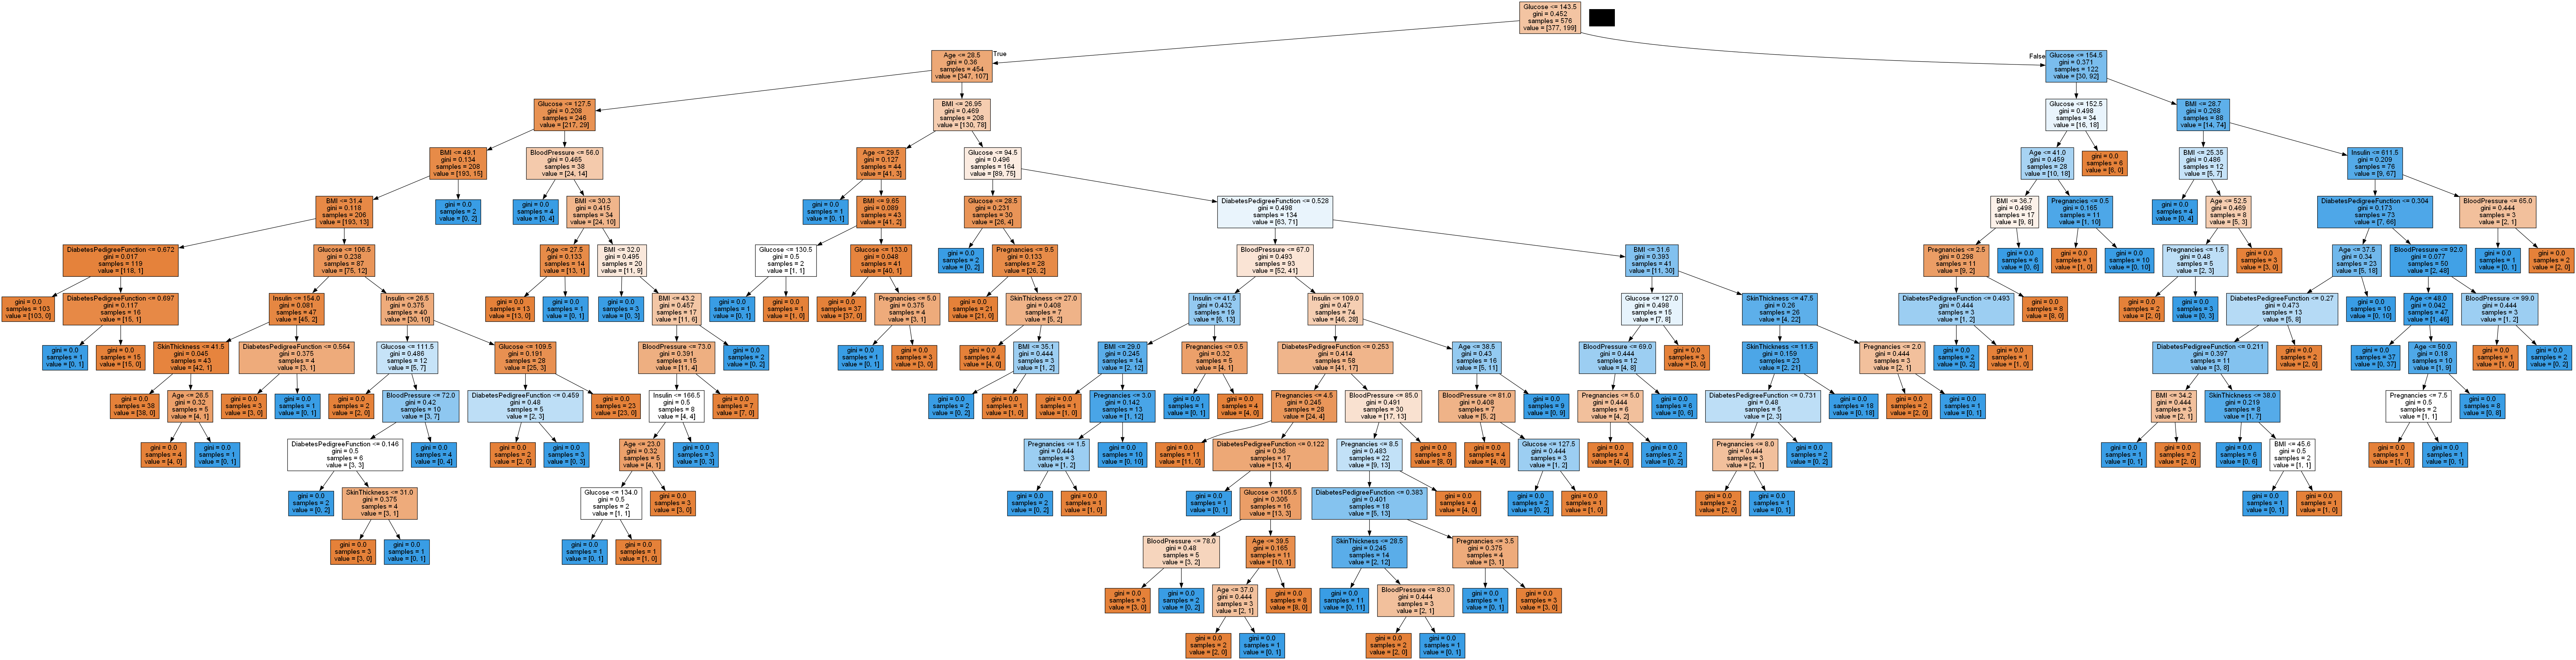

In [ ]:
Image(graph.create_png())

### Make Decision Rules

In [ ]:
from sklearn.tree import export_text

In [ ]:
tree_rules = export_text(model, feature_names=list(X_train.columns))
print(tree_rules)

|--- Glucose <= 143.50
|   |--- Age <= 28.50
|   |   |--- Glucose <= 127.50
|   |   |   |--- BMI <= 49.10
|   |   |   |   |--- BMI <= 31.40
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.70
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- DiabetesPedigreeFunction >  0.70
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  31.40
|   |   |   |   |   |--- Glucose <= 106.50
|   |   |   |   |   |   |--- Insulin <= 154.00
|   |   |   |   |   |   |   |--- SkinThickness <= 41.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- SkinThickness >  41.50
|   |   |   |   |   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age >  26.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   

### Extracting Python Code of Decision Rules

In [ ]:
pip install skompiler

     ---------------------------------------- 0.0/45.5 kB ? eta -:--:--
     ------------------------- ------------ 30.7/45.5 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 45.5/45.5 kB 452.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for skompiler: started
  Running setup.py install for skompiler: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: skompiler is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [ ]:
pip install astor

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from skompiler import skompile
import astor

In [ ]:
print(skompile(model.predict).to('python/code'))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 41.5 else 0 if x[7] <=
    26.5 else 1) if x[4] <= 154.0 else 0 if x[6] <= 0.5635000169277191 else
    1) if x[1] <= 106.5 else (0 if x[1] <= 111.5 else (1 if x[6] <= 
    0.1459999978542328 else 0 if x[3] <= 31.0 else 1) if x[2] <= 72.0 else 
    1) if x[4] <= 26.5 else (0 if x[6] <= 0.45900000631809235 else 1) if x[
    1] <= 109.5 else 0) if x[5] <= 49.10000038146973 else 1) if x[1] <= 
    127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 1) if x[5] <=
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((((1 if x
    [1] <= 134.0 else 0) if x[7] <= 23.0 else 0) if x[4] <= 166.5 else 1) if
    x[2] <= 73.0 else 0) if x[5] <= 43.20000076293945 else 1) if x[7] <= 
    28.5 else (1 if x[7] <= 29.5 else (1 if x[1] <= 130.5 else 0) if x[5] <=
    9.649999618530273 else 0 if x[1] <= 133.0 else 1 if x[0] <= 5.0 else 0) if
    x[5] <= 2